In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


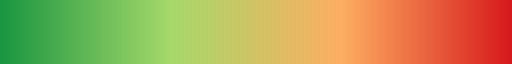

In [4]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4'
subfolder_PL = glob.glob(cwd + '/quinine**PL**')
subfolder_PL.sort()
subfolder_Abs = glob.glob(cwd + '/quinine**Abs**')
subfolder_Abs.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder_PL, sep = '\n')  ## Print one element per line
print(*subfolder_Abs, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/quinine_1E-4M_300ms_PL_20230802-180155_bc013bd4.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/quinine_1E-4M_400ms_PL_20230802-175539_9a514f11.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/quinine_1E-4M_500ms_PL_20230802-174630_eebe331f.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/quinine_2E-4M_300ms_PL_20230802-180319_48fd1664.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/quinine_2E-4M_400ms_PL_20230802-175726_e3124f23.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [6]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df = pd.DataFrame()

for i in range(len(subfolder_PL)):
    data_files = subfolder_PL
    # data_files = glob.glob(subfolder[i] + '/raw_tiff_xy/**.xy')
    # data_files.sort()
    # del data_files[0]
    suffix = os.path.basename(subfolder_PL[i])
    id0 = 8
    id1 = 22

    skiprows = 7 ## skip 23 rows if data processed by dioptas or ## 8
    # df_temp = pd.DataFrame()
    
    # for j in range(len(data_files)):        
    #     df = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
    #     df_temp = pd.concat([df_temp, df[f'{suffix[id0:id1]}'], axis=1, ignore_index=False)
    #     df_int = pd.concat([df_int, df[f'{suffix[id0:id1]}']], axis=1, ignore_index=False)
    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_int = pd.concat([df_int, df_temp[f'{suffix}_mean']], axis=1, ignore_index=False)
    
    df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df[f'x_{suffix[id0:id1]}'] = df_temp['Wavelength']
    df[f'{suffix[id0:id1]}'] = df_temp['Fluorescence']
    

In [7]:
df

,x_1E-4M_300ms_PL,1E-4M_300ms_PL,x_1E-4M_400ms_PL,1E-4M_400ms_PL,x_1E-4M_500ms_PL,1E-4M_500ms_PL,x_2E-4M_300ms_PL,2E-4M_300ms_PL,x_2E-4M_400ms_PL,2E-4M_400ms_PL,x_2E-4M_500ms_PL,2E-4M_500ms_PL,x_5E-4M_300ms_PL,5E-4M_300ms_PL,x_5E-4M_400ms_PL,5E-4M_400ms_PL,x_5E-4M_500ms_PL,5E-4M_500ms_PL
0,197.742294,2.222222,197.742294,1.152778,197.742294,0.722222,197.742294,2.444444,197.742294,0.847222,197.742294,0.069444,197.742294,2.444444,197.742294,1.486111,197.742294,0.277778
1,198.544478,2.222222,198.544478,1.180556,198.544478,0.500000,198.544478,2.111111,198.544478,1.263889,198.544478,1.041667,198.544478,2.444444,198.544478,0.180556,198.544478,0.166667
2,199.346597,2.555556,199.346597,1.375000,199.346597,1.388889,199.346597,3.666667,199.346597,1.180556,199.346597,1.930556,199.346597,2.666667,199.346597,0.708333,199.346597,0.944444
3,200.148650,3.555556,200.148650,2.180556,200.148650,0.388889,200.148650,3.333333,200.148650,0.069444,200.148650,0.180556,200.148650,1.666667,200.148650,1.291667,200.148650,0.500000
4,200.950637,0.666667,200.950637,0.180556,200.950637,9.055556,200.950637,1.888889,200.950637,3.291667,200.950637,8.069444,200.950637,1.777778,200.950637,2.819444,200.950637,8.944444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.769837,0.666667,990.769837,4.152778,990.769837,1.166667,990.769837,1.444444,990.769837,6.180556,990.769837,1.930556,990.769837,2.000000,990.769837,3.152778,990.769837,3.833333
1040,991.489165,2.777778,991.489165,1.263889,991.489165,2.055556,991.489165,2.555556,991.489165,0.708333,991.489165,1.930556,991.489165,1.888889,991.489165,0.375000,991.489165,1.500000
1041,992.208398,1.000000,992.208398,2.291667,992.208398,1.166667,992.208398,0.000000,992.208398,3.263889,992.208398,1.291667,992.208398,0.222222,992.208398,2.625000,992.208398,1.166667
1042,992.927537,0.111111,992.927537,0.152778,992.927537,1.500000,992.927537,0.000000,992.927537,0.291667,992.927537,3.180556,992.927537,0.666667,992.927537,0.486111,992.927537,1.500000


## Check data in pd dataframe

In [8]:
df.keys()

Index(['x_1E-4M_300ms_PL', '1E-4M_300ms_PL', 'x_1E-4M_400ms_PL',
       '1E-4M_400ms_PL', 'x_1E-4M_500ms_PL', '1E-4M_500ms_PL',
       'x_2E-4M_300ms_PL', '2E-4M_300ms_PL', 'x_2E-4M_400ms_PL',
       '2E-4M_400ms_PL', 'x_2E-4M_500ms_PL', '2E-4M_500ms_PL',
       'x_5E-4M_300ms_PL', '5E-4M_300ms_PL', 'x_5E-4M_400ms_PL',
       '5E-4M_400ms_PL', 'x_5E-4M_500ms_PL', '5E-4M_500ms_PL'],
      dtype='object')

In [9]:
df.shape

(1044, 18)

## Prepare keys for average scans in pd dataframe

In [10]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_1E-4M_300ms_PL',
 '1E-4M_300ms_PL',
 'x_1E-4M_400ms_PL',
 '1E-4M_400ms_PL',
 'x_1E-4M_500ms_PL',
 '1E-4M_500ms_PL',
 'x_2E-4M_300ms_PL',
 '2E-4M_300ms_PL',
 'x_2E-4M_400ms_PL',
 '2E-4M_400ms_PL',
 'x_2E-4M_500ms_PL',
 '2E-4M_500ms_PL',
 'x_5E-4M_300ms_PL',
 '5E-4M_300ms_PL',
 'x_5E-4M_400ms_PL',
 '5E-4M_400ms_PL',
 'x_5E-4M_500ms_PL',
 '5E-4M_500ms_PL']

In [11]:
title = [os.path.basename(subfolder_PL[i]) for i in range(len(subfolder_PL))]
print(*title, sep='\n')

label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label2 = ['300ms', '400ms', '500ms']
         # 'ZnI2 128 uL/min']

quinine_1E-4M_300ms_PL_20230802-180155_bc013bd4.csv
quinine_1E-4M_400ms_PL_20230802-175539_9a514f11.csv
quinine_1E-4M_500ms_PL_20230802-174630_eebe331f.csv
quinine_2E-4M_300ms_PL_20230802-180319_48fd1664.csv
quinine_2E-4M_400ms_PL_20230802-175726_e3124f23.csv
quinine_2E-4M_500ms_PL_20230802-174909_a15e5192.csv
quinine_5E-4M_300ms_PL_20230802-180457_13f94732.csv
quinine_5E-4M_400ms_PL_20230802-175847_b62eaffd.csv
quinine_5E-4M_500ms_PL_20230802-175143_1bdeebdd.csv


## Plot PL scans together

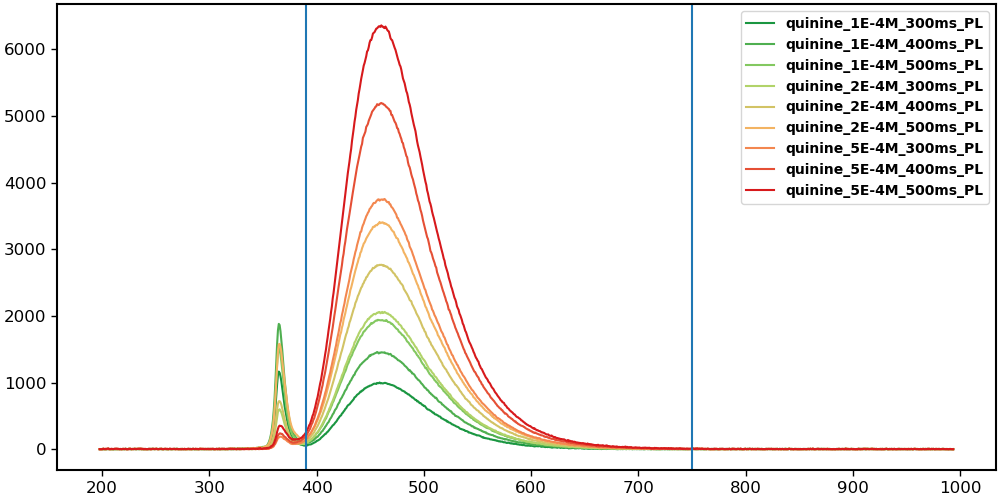

In [12]:
f1, ax1 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
offset = 500
id0 = 8
id1 = 22

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax1.plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)

# ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

ax1.axvline(w0)
ax1.axvline(w1)

## Create new folder "plqy" for saving data

In [13]:
new_dir = cwd + '/plqy'

try:
    os.mkdir(new_dir)
except FileExistsError:
    pass

# if os.path.exists(new_dir):
#     pass
# else:
#     os.mkdir(new_dir)

## Integrate peak area

In [14]:
simpson_int = []
for i in range(len(title)):
    x = df[keys_list[i*2]][idx_w0:idx_w1]
    y = df[keys_list[i*2+1]][idx_w0:idx_w1]
    simpson_int.append(integrate.simpson(y, x))

df_int = pd.DataFrame()
df_int['Data_source'] = [title[i][:-4] for i in range(len(title))]
df_int['Simpson_integrate'] = simpson_int
df_int

,Data_source,Simpson_integrate
0,quinine_1E-4M_300ms_PL_20230802-180155_bc013bd4,100227.694304
1,quinine_1E-4M_400ms_PL_20230802-175539_9a514f11,146868.399572
2,quinine_1E-4M_500ms_PL_20230802-174630_eebe331f,196055.145883
3,quinine_2E-4M_300ms_PL_20230802-180319_48fd1664,207045.368634
4,quinine_2E-4M_400ms_PL_20230802-175726_e3124f23,279153.064612
5,quinine_2E-4M_500ms_PL_20230802-174909_a15e5192,343487.634219
6,quinine_5E-4M_300ms_PL_20230802-180457_13f94732,378045.628307
7,quinine_5E-4M_400ms_PL_20230802-175847_b62eaffd,523207.927316
8,quinine_5E-4M_500ms_PL_20230802-175143_1bdeebdd,640529.154955


## Save Simpson integrate of PL peak

In [15]:
# df_int.to_csv(os.path.join(new_dir, 'simpson_integrate.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [16]:
# df_int.to_csv('500mM_simpson_integrate.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Absorbance

### Read Abs data into pandas dataframe

In [17]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df2 = pd.DataFrame()
df21 = pd.DataFrame()

for i in range(len(subfolder_Abs)):
    data_files = subfolder_Abs
    # data_files = glob.glob(subfolder[i] + '/raw_tiff_xy/**.xy')
    # data_files.sort()
    # del data_files[0]
    suffix = os.path.basename(subfolder_Abs[i])
    id0 = 8
    id1 = 22

    skiprows = 7 ## skip 23 rows if data processed by dioptas or ## 8
    df_temp = pd.DataFrame()
    
    # for j in range(len(data_files)):        
    #     df = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
    #     df_temp = pd.concat([df_temp, df[f'{suffix[id0:id1]}'], axis=1, ignore_index=False)
    #     df_int = pd.concat([df_int, df[f'{suffix[id0:id1]}']], axis=1, ignore_index=False)
    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_int = pd.concat([df_int, df_temp[f'{suffix}_mean']], axis=1, ignore_index=False)
    
    df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df2[f'x_{suffix[id0:id1]}'] = df_temp['Wavelength']
    df2[f'{suffix[id0:id1]}'] = df_temp['Absorbance']
    
    df21[f'x_{suffix[id0:id1]}'] = df_temp['Wavelength']
    df21[f'{suffix[id0:id1]}'] = df_temp['Sample']
    

In [18]:
df2

,x_1E-4M_300ms_Ab,1E-4M_300ms_Ab,x_1E-4M_400ms_Ab,1E-4M_400ms_Ab,x_1E-4M_500ms_Ab,1E-4M_500ms_Ab,x_2E-4M_300ms_Ab,2E-4M_300ms_Ab,x_2E-4M_400ms_Ab,2E-4M_400ms_Ab,x_2E-4M_500ms_Ab,2E-4M_500ms_Ab,x_5E-4M_300ms_Ab,5E-4M_300ms_Ab,x_5E-4M_400ms_Ab,5E-4M_400ms_Ab,x_5E-4M_500ms_Ab,5E-4M_500ms_Ab
0,197.742294,-0.185494,197.742294,-0.397582,197.742294,-0.706574,197.742294,-0.134699,197.742294,-0.486550,197.742294,-0.947174,197.742294,-0.076247,197.742294,-0.556898,197.742294,-0.865020
1,198.544478,-0.294956,198.544478,-0.323447,198.544478,-0.771734,198.544478,-0.287415,198.544478,-0.398613,198.544478,-1.009171,198.544478,-0.140733,198.544478,-0.381705,198.544478,-0.928434
2,199.346597,-0.249478,199.346597,-0.292531,199.346597,-0.655424,199.346597,-0.251471,199.346597,-0.345270,199.346597,-0.895957,199.346597,-0.120660,199.346597,-0.276800,199.346597,-0.816056
3,200.148650,-0.167192,200.148650,0.043608,200.148650,-0.648959,200.148650,-0.126659,200.148650,-0.016808,200.148650,-0.894849,200.148650,-0.049874,200.148650,-0.011131,200.148650,-0.809354
4,200.950637,-0.065146,200.950637,0.015583,200.950637,0.187144,200.950637,0.081291,200.950637,0.035128,200.950637,0.193181,200.950637,0.342166,200.950637,0.169900,200.950637,0.434968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.769837,-0.182269,990.769837,-0.146931,990.769837,-0.023284,990.769837,-0.161055,990.769837,-0.214370,990.769837,-0.037876,990.769837,-0.048975,990.769837,-0.218946,990.769837,-0.036211
1040,991.489165,-0.163301,991.489165,-0.165497,991.489165,-0.809638,991.489165,-0.139284,991.489165,-0.227376,991.489165,-1.063884,991.489165,-0.039227,991.489165,-0.227002,991.489165,-0.977677
1041,992.208398,-0.356451,992.208398,NaN,992.208398,NaN,992.208398,-0.414973,992.208398,NaN,992.208398,NaN,992.208398,-0.238882,992.208398,NaN,992.208398,NaN
1042,992.927537,0.138949,992.927537,NaN,992.927537,-1.127085,992.927537,0.043466,992.927537,NaN,992.927537,-1.394536,992.927537,0.219557,992.927537,NaN,992.927537,-1.304731


## Prepare keys for average scans in pd dataframe

In [19]:
keys_list2 = list(df2.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_1E-4M_300ms_Ab',
 '1E-4M_300ms_Ab',
 'x_1E-4M_400ms_Ab',
 '1E-4M_400ms_Ab',
 'x_1E-4M_500ms_Ab',
 '1E-4M_500ms_Ab',
 'x_2E-4M_300ms_Ab',
 '2E-4M_300ms_Ab',
 'x_2E-4M_400ms_Ab',
 '2E-4M_400ms_Ab',
 'x_2E-4M_500ms_Ab',
 '2E-4M_500ms_Ab',
 'x_5E-4M_300ms_Ab',
 '5E-4M_300ms_Ab',
 'x_5E-4M_400ms_Ab',
 '5E-4M_400ms_Ab',
 'x_5E-4M_500ms_Ab',
 '5E-4M_500ms_Ab']

In [20]:
title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
print(*title, sep='\n')

label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label2 = ['300ms', '400ms', '500ms']
         # 'ZnI2 128 uL/min']

quinine_1E-4M_300ms_Abs_20230802-180145_feab855a.csv
quinine_1E-4M_400ms_Abs_20230802-175531_cc1c327f.csv
quinine_1E-4M_500ms_Abs_20230802-174618_d3db72b5.csv
quinine_2E-4M_300ms_Abs_20230802-180311_402d3d3f.csv
quinine_2E-4M_400ms_Abs_20230802-175717_0447d410.csv
quinine_2E-4M_500ms_Abs_20230802-174859_6cfb7d1d.csv
quinine_5E-4M_300ms_Abs_20230802-180445_bc7a1b17.csv
quinine_5E-4M_400ms_Abs_20230802-175834_687b7319.csv
quinine_5E-4M_500ms_Abs_20230802-175134_c8627045.csv


## Plot Abs scans together

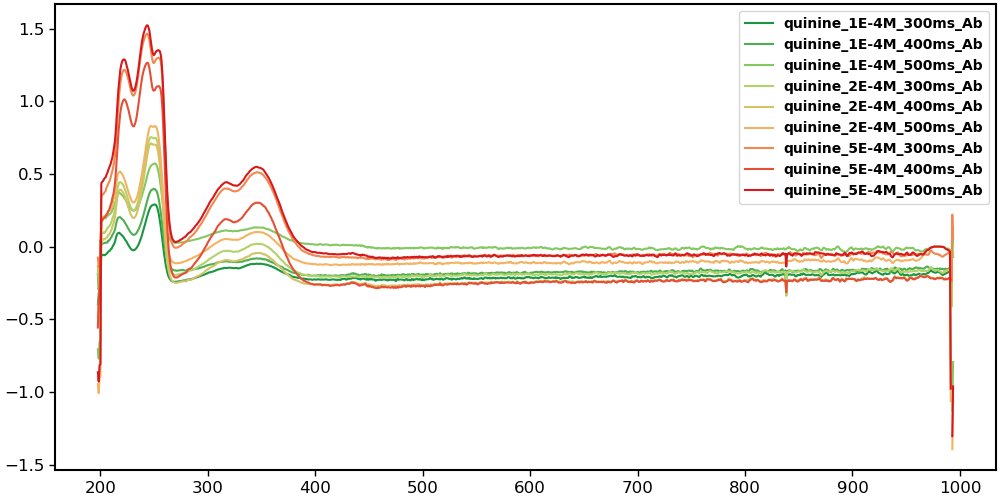

In [21]:
f2, ax2 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
offset = 500
id0 = 8
id1 = 22
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

# ax2.set_xlim(-0.5, 20)
# ax2.set_ylim(2500, 9500)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Try linear fitting

In [22]:
def line_2D(x, slope, y_intercept):
    y = x*slope + y_intercept
    return y


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def fit_line_2D(x, y, fit_function, x_range=[500, 900], maxfev=10000, plot=True):
    x = np.asarray(x)
    y = np.asarray(y)
    y = np.nan_to_num(y, nan=0)
    
    try:        
        idx0, _ = find_nearest(x, x_range[0])
        idx1, _ = find_nearest(x, x_range[1])
    except (TypeError, IndexError):
        idx0 = 0
        idx1 = -1
    
    slope = (x[idx1]-x[idx0])/(y[idx1]-y[idx0])
    y_intercept = np.mean(y[idx0:idx1])
    
    try:
        initial_guess = [slope, y_intercept]
    except (TypeError, IndexError):
        initial_guess = [0.01, 0]
    
    try:
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
    except RuntimeError:
        maxfev=1000000
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
        
    if plot:
        plt.figure()
        plt.plot(x, y, label='data')
        plt.plot(x, fit_function(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        plt.legend()
    
    return popt, pcov


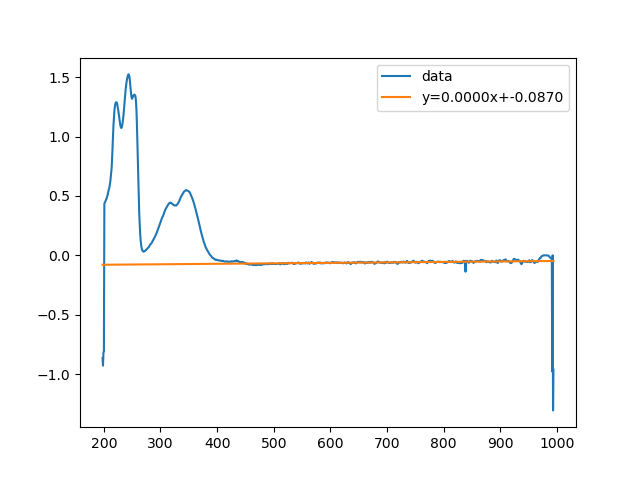

In [23]:
x = df2[keys_list2[-2]]
y = df2[keys_list2[-1]]
popt, pcov = fit_line_2D(x,y,line_2D, x_range=[600, 900])

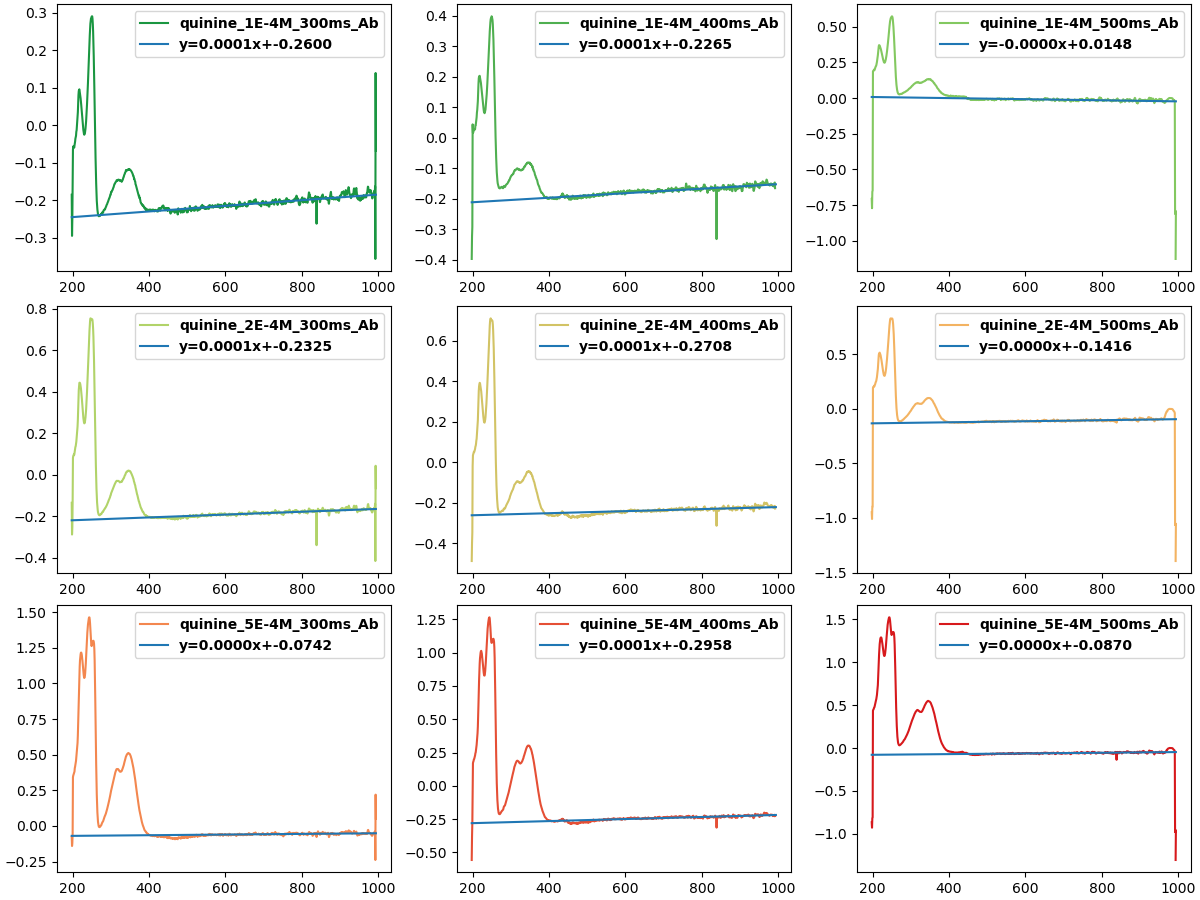

In [24]:
rows = 3
cols = 3
f3, ax3 = plt.subplots(rows, cols, figsize = (12, 9), constrained_layout=True)

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22
x_range_list = [[400, 900], [400, 900], [400, 900], 
                [500, 900], [600, 900], [600, 800], 
                [600, 900], [500, 900], [600, 900]]

legend_properties = {'weight':'bold', 'size':10}
df4 = pd.DataFrame()
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    x = df2[keys_list2[i*2]]
    y = df2[keys_list2[i*2+1]]
    popt, pcov = fit_line_2D(x, y, line_2D, x_range=x_range_list[i], plot=False)
    ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, y, color=cmap(color_idx[i]), label=label[i][:id1])
    ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, line_2D(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
    ax3[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
    
    df4[keys_list2[i*2]] = x
    # df4[keys_list2[i*2+1]] = y - popt[1]
    df4[keys_list2[i*2+1]] = y - line_2D(x, *popt)
    

# # ax3.set_xlim(-0.5, 20)
# # ax3.set_ylim(2500, 9500)
# # ax3.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# # ax3.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax3.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax3.spines["bottom"].set_linewidth(spinewidth)
# ax3.spines["right"].set_linewidth(spinewidth)
# ax3.spines["top"].set_linewidth(spinewidth)
# ax3.spines["left"].set_linewidth(spinewidth)

## Plot Abs by offset

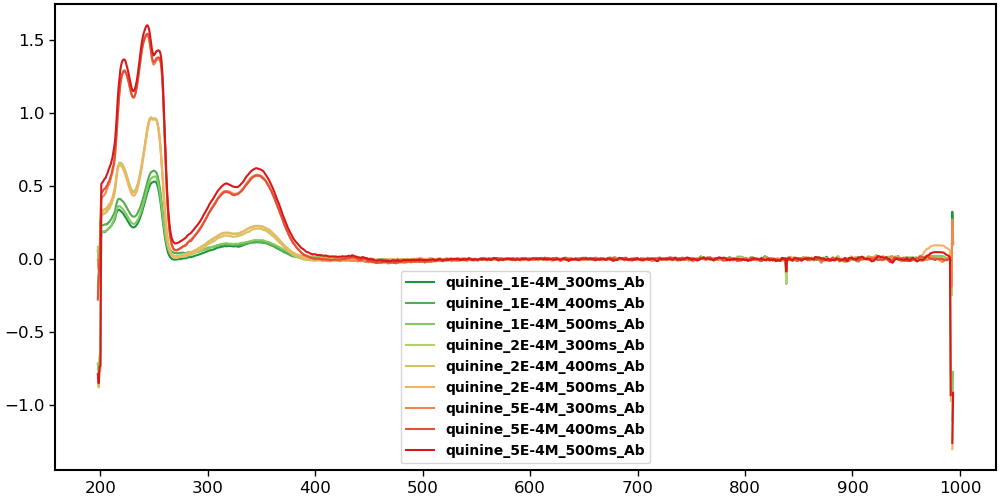

In [25]:
f4, ax4 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
offset = 500
id0 = 8
id1 = 22
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax4.plot(df4[keys_list2[i*2]], df4[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

# ax4.set_xlim(-0.5, 20)
# ax4.set_ylim(2500, 9500)
# ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for offset data in pd dataframe

In [26]:
keys_list4 = list(df4.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list4

['x_1E-4M_300ms_Ab',
 '1E-4M_300ms_Ab',
 'x_1E-4M_400ms_Ab',
 '1E-4M_400ms_Ab',
 'x_1E-4M_500ms_Ab',
 '1E-4M_500ms_Ab',
 'x_2E-4M_300ms_Ab',
 '2E-4M_300ms_Ab',
 'x_2E-4M_400ms_Ab',
 '2E-4M_400ms_Ab',
 'x_2E-4M_500ms_Ab',
 '2E-4M_500ms_Ab',
 'x_5E-4M_300ms_Ab',
 '5E-4M_300ms_Ab',
 'x_5E-4M_400ms_Ab',
 '5E-4M_400ms_Ab',
 'x_5E-4M_500ms_Ab',
 '5E-4M_500ms_Ab']

## Save offset data as csv

In [27]:
for i in range(len(title)):
    df_temp = pd.DataFrame()
    df_temp['Wavelength'] = df4[keys_list4[i*2]].fillna(0)
    df_temp['Absorbance'] = df4[keys_list4[i*2+1]].fillna(0)
    fn = title[i][:id1] + '_offset.csv'
    print(fn)
    # df_temp.to_csv(os.path.join(new_dir, fn), index=False, sep=',', float_format='{:.8e}'.format)

quinine_1E-4M_300ms_Ab_offset.csv
quinine_1E-4M_400ms_Ab_offset.csv
quinine_1E-4M_500ms_Ab_offset.csv
quinine_2E-4M_300ms_Ab_offset.csv
quinine_2E-4M_400ms_Ab_offset.csv
quinine_2E-4M_500ms_Ab_offset.csv
quinine_5E-4M_300ms_Ab_offset.csv
quinine_5E-4M_400ms_Ab_offset.csv
quinine_5E-4M_500ms_Ab_offset.csv


## Save Absorbance at 365 nm

In [28]:
idx_365, w365 = find_nearest(df4[keys_list2[0]], 365)
# df4.iloc[idx_365][::-2][::-1].to_list()

df_365 = pd.DataFrame()
df_365['Data_source'] = [title[i][:-4] for i in range(len(title))]
df_365['Abs_365'] = df2.iloc[idx_365][::-2][::-1].to_list()
df_365['Abs_offset_365'] = df4.iloc[idx_365][::-2][::-1].to_list()
df_365

,Data_source,Abs_365,Abs_offset_365
0,quinine_1E-4M_300ms_Abs_20230802-180145_feab855a,-0.157572,0.075017
1,quinine_1E-4M_400ms_Abs_20230802-175531_cc1c327f,-0.125282,0.074205
2,quinine_1E-4M_500ms_Abs_20230802-174618_d3db72b5,0.090738,0.089915
3,quinine_2E-4M_300ms_Abs_20230802-180311_402d3d3f,-0.061098,0.146470
4,quinine_2E-4M_400ms_Abs_20230802-175717_0447d410,-0.123564,0.128761
5,quinine_2E-4M_500ms_Abs_20230802-174859_6cfb7d1d,0.022054,0.146218
6,quinine_5E-4M_300ms_Abs_20230802-180445_bc7a1b17,0.304058,0.369903
7,quinine_5E-4M_400ms_Abs_20230802-175834_687b7319,0.096801,0.364363
8,quinine_5E-4M_500ms_Abs_20230802-175134_c8627045,0.332786,0.405307


In [29]:
# df_365.to_csv(os.path.join(new_dir, 'abs_365.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [30]:
# df_365.to_csv('500mM_abs_365.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Compare dark and Ref saved in addtional scans

## Reading dark and reference

In [31]:
dark = glob.glob(cwd + '/Dark**.csv')
ref = glob.glob(cwd + '/H2SO4**.csv')

dark.sort()
ref.sort()

# subfolder_Cl.reverse()
# del subfolder[-1]
print(*dark, sep = '\n')  ## Print one element per line
print(*ref, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/Dark_300ms_Abs_20230802-180028_c01054eb.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/Dark_400ms_Abs_20230802-175349_b4e525e9.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/Dark_500ms_Abs_20230802-174406_ef839a01.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/H2SO4_500mM_300ms_Abs_20230802-180034_b9592056.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/H2SO4_500mM_400ms_Abs_20230802-175356_3c95d886.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4/H2SO4_500mM_500ms_Abs_

## Calculate Absorbance from additional Dark & Ref

In [32]:
skiprows = 7
df3 = pd.DataFrame()
id0 = 8
id1 = 22
for t in ['300ms', '400ms', '500ms']:
    for i in title:        
        for j in dark:
            for k in ref:
                if (t in i) and (t in j) and (t in k):
                    # print(t+'\n',i+'\n',os.path.basename(j)+'\n',os.path.basename(k)+'\n')
                    dark_df = pd.read_csv(j, skiprows=skiprows, sep=',')
                    ref_df = pd.read_csv(k, skiprows=skiprows, sep=',')
                    
                    # suffix = os.path.basename(subfolder_Abs[i])
                    suffix = i
                    df3[f'x_{suffix[id0:id1]}'] = df21[f'x_{suffix[id0:id1]}']
                    absorbance = -np.log10((df21[f'{suffix[id0:id1]}']-dark_df['Sample'])/(ref_df['Sample']-dark_df['Sample']))
                    df3[f'{suffix[id0:id1]}'] = absorbance

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


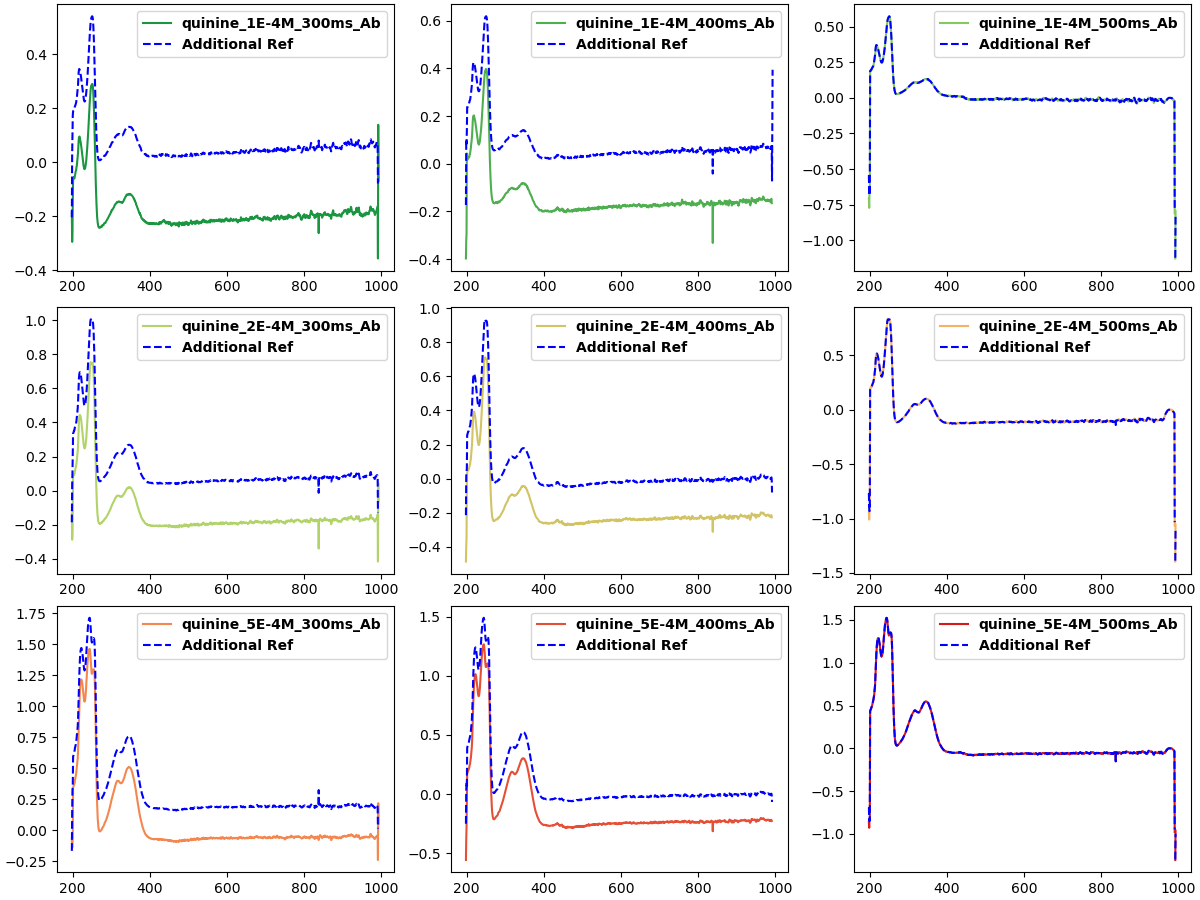

In [33]:
rows = 3
cols = 3
f31, ax31 = plt.subplots(rows, cols, figsize = (12, 9), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22

legend_properties = {'weight':'bold', 'size':10} 
for i in range(len(title)):
    # ax31.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    ax31[idx_ax[0][0], idx_ax[0][1]].plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])
    ax31[idx_ax[0][0], idx_ax[0][1]].plot(df3[keys_list2[i*2]], df3[keys_list2[i*2+1]], 'b--', label='Additional Ref')

    ax31[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)

# ax31.set_xlim(-0.5, 20)
# ax31.set_ylim(2500, 9500)
# ax31.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax31.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax31.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax31.spines["bottom"].set_linewidth(spinewidth)
# ax31.spines["right"].set_linewidth(spinewidth)
# ax31.spines["top"].set_linewidth(spinewidth)
# ax31.spines["left"].set_linewidth(spinewidth)